In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.regression.rolling import RollingOLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import coint
import statsmodels.tsa.stattools as ts
import glob
import os

In [4]:
path=r"C:\Users\manan\Downloads\Pt 1\data\\DataBETA"
csv_files = glob.glob(os.path.join(path, "*.csv"))
file_data_dict = {}

dfl=[]
for f in csv_files:
    x= pd.read_csv(f)
    x.index=pd.to_datetime(x['time'])
    x=x['close']
    dfl.append(x)

for idx, file in enumerate(csv_files):
    file_name = os.path.basename(file)
    file_data_dict[idx] = file_name
modified_dict = {}
for key, file_name in file_data_dict.items():
    new_value = file_name.split('data_')[1].split('-USDT-SWAP.csv')[0]
    modified_dict[key] = new_value

In [5]:
df_dict = {}
for i in range(len(dfl)):
    df_dict[i] = pd.DataFrame({modified_dict[i]: dfl[i]})

In [6]:
row_col_names = list(modified_dict.values())
df = pd.DataFrame(1,index=row_col_names, columns=row_col_names)
merged_df = pd.concat(dfl, axis=1)
merged_df.columns = [modified_dict[i] for i in range(len(dfl))]
merged_df=merged_df.dropna()

In [98]:
merged_df

,1INCH,AAVE,ACE,ACH,ADA,AEVO,AGLD,AIDOGE,ALGO,ALPHA,...,GFT,GMT,GMX,GODS,GPT,GRT,HBAR,ICP,ICX,ID
time,,,,,,,,,,,,,,,,,,,,,
2024-03-18 17:55:00,0.5767,125.30,10.375,0.03975,0.6820,2.4830,1.4700,5.893000e-10,0.2615,0.16290,...,0.02789,0.3010,49.81,0.3499,0.54823,0.4263,0.11317,12.506,0.3129,1.6552
2024-03-18 18:00:00,0.5752,125.17,10.354,0.03983,0.6801,2.4660,1.4690,5.917000e-10,0.2607,0.16250,...,0.02796,0.3004,49.72,0.3492,0.54692,0.4247,0.11300,12.483,0.3151,1.6519
2024-03-18 18:05:00,0.5780,125.38,10.425,0.03993,0.6841,2.4820,1.4760,5.936000e-10,0.2621,0.16350,...,0.02821,0.3027,49.90,0.3503,0.55060,0.4241,0.11344,12.551,0.3149,1.6514
2024-03-18 18:10:00,0.5747,124.70,10.351,0.03978,0.6808,2.4710,1.4760,5.905000e-10,0.2604,0.16260,...,0.02828,0.3010,49.75,0.3490,0.55250,0.4216,0.11281,12.476,0.3139,1.6412
2024-03-18 18:15:00,0.5745,124.63,10.322,0.03981,0.6799,2.4600,1.4720,5.905000e-10,0.2602,0.16230,...,0.02796,0.3005,49.74,0.3479,0.55075,0.4215,0.11270,12.458,0.3132,1.6381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27 22:05:00,0.2536,123.14,2.349,0.01943,0.3640,0.3702,0.8431,2.514000e-10,0.1333,0.06050,...,0.02213,0.1360,28.05,0.1958,0.08855,0.1587,0.05465,8.083,0.1353,0.3836
2024-08-27 22:10:00,0.2525,123.08,2.344,0.01938,0.3632,0.3685,0.8423,2.503000e-10,0.1331,0.06024,...,0.02219,0.1356,27.82,0.1954,0.08766,0.1581,0.05449,8.089,0.1348,0.3826
2024-08-27 22:15:00,0.2528,123.05,2.351,0.01943,0.3638,0.3687,0.8448,2.534000e-10,0.1334,0.06038,...,0.02233,0.1362,27.87,0.1957,0.08804,0.1585,0.05460,8.103,0.1353,0.3841


In [99]:
df1=merged_df['1INCH']
df2=merged_df['AAVE']

In [100]:
data = pd.concat([df1, df2], axis = 1)
data = data.dropna()

print(data)

                      1INCH    AAVE
time                               
2024-03-18 17:55:00  0.5767  125.30
2024-03-18 18:00:00  0.5752  125.17
2024-03-18 18:05:00  0.5780  125.38
2024-03-18 18:10:00  0.5747  124.70
2024-03-18 18:15:00  0.5745  124.63
...                     ...     ...
2024-08-27 22:05:00  0.2536  123.14
2024-08-27 22:10:00  0.2525  123.08
2024-08-27 22:15:00  0.2528  123.05
2024-08-27 22:20:00  0.2521  122.75
2024-08-27 22:25:00  0.2517  122.67

[46711 rows x 2 columns]


In [101]:
data

,1INCH,AAVE
time,,
2024-03-18 17:55:00,0.5767,125.30
2024-03-18 18:00:00,0.5752,125.17
2024-03-18 18:05:00,0.5780,125.38
2024-03-18 18:10:00,0.5747,124.70
2024-03-18 18:15:00,0.5745,124.63
...,...,...
2024-08-27 22:05:00,0.2536,123.14
2024-08-27 22:10:00,0.2525,123.08
2024-08-27 22:15:00,0.2528,123.05


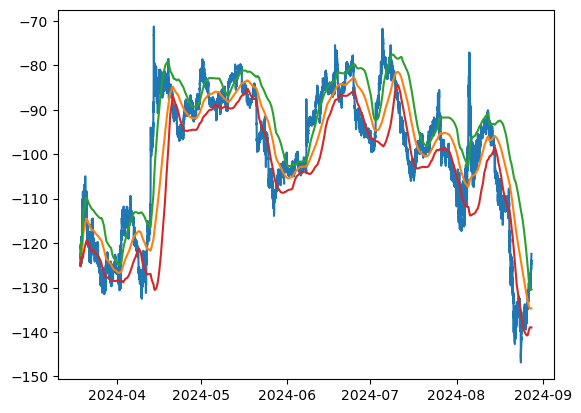

In [102]:
spd = data['1INCH'] - data['AAVE']
meanSpd = spd.rolling('7D').mean()
stdSpd = spd.rolling('7D').std()


plt.plot(spd.index, spd)
plt.plot(meanSpd.index, meanSpd)
plt.plot(meanSpd.index, meanSpd + stdSpd)
plt.plot(meanSpd.index, meanSpd - stdSpd)

In [103]:
entryTime = {}
exitTime = {}
entrySpd = {}
exitSpd = {}
side = {}
pos = 0
num = 0
for i in range(len(spd)):
    if pos == 0:
        if spd.iloc[i] > meanSpd.iloc[i] + stdSpd.iloc[i]:
            pos = -1
            entryTime[num] = spd.index[i]
            entrySpd[num] = spd.iloc[i]
            side[num] = -1
        elif spd.iloc[i] < meanSpd.iloc[i] - stdSpd.iloc[i]:
            pos = 1
            entryTime[num] = spd.index[i]
            entrySpd[num] = spd.iloc[i]
            side[num] = 1
            
    elif pos == 1:
        if spd.iloc[i] > meanSpd.iloc[i]:
            exitTime[num] = spd.index[i]
            exitSpd[num] = spd.iloc[i]
            pos = 0
            num += 1
    elif pos == -1:
        if spd.iloc[i] < meanSpd.iloc[i]:
            exitTime[num] = spd.index[i]
            exitSpd[num] = spd.iloc[i]
            pos = 0
            num += 1
            
dg = pd.DataFrame({'entryTime': entryTime,  'exitTime': exitTime,'entryspd':entrySpd, 'exitspd':exitSpd, 'side': side})
dg['pnl'] = ( dg['exitspd'] - dg['entryspd'])*dg['side']
dg['cumpnl']=dg['pnl'].cumsum()
dg['duration']=(dg['exitTime']-dg['entryTime'])
dg=dg.dropna()
dg['dur'] = (dg['exitTime'] - dg['entryTime']).apply(lambda x: x.total_seconds())
print (dg)

             entryTime            exitTime  entryspd   exitspd  side      pnl  \
0  2024-03-18 18:10:00 2024-03-18 18:20:00 -124.1253 -124.8828    -1   0.7575   
1  2024-03-18 18:25:00 2024-03-18 18:35:00 -125.2511 -124.3870     1   0.8641   
2  2024-03-18 18:45:00 2024-03-18 19:00:00 -123.9219 -124.4677    -1   0.5458   
3  2024-03-18 19:10:00 2024-03-18 21:45:00 -122.6062 -123.0960    -1   0.4898   
4  2024-03-18 22:20:00 2024-03-19 01:50:00 -120.2885 -121.4673    -1   1.1788   
5  2024-03-19 02:10:00 2024-03-19 06:05:00 -123.3946 -121.8377     1   1.5569   
6  2024-03-19 06:20:00 2024-03-21 00:20:00 -119.7077 -115.5673    -1  -4.1404   
7  2024-03-21 02:40:00 2024-03-22 19:05:00 -119.7023 -116.7076     1   2.9947   
8  2024-03-23 12:35:00 2024-03-28 00:25:00 -122.0738 -123.4727     1  -1.3989   
9  2024-03-29 09:55:00 2024-03-29 13:15:00 -128.7016 -124.4165     1   4.2851   
10 2024-03-29 19:05:00 2024-03-30 03:25:00 -128.5471 -125.3720     1   3.1751   
11 2024-03-31 03:35:00 2024-

In [104]:
data1 = pd.concat([df1, df2], axis = 1)
data1 = data.dropna()


In [105]:
data1

,1INCH,AAVE
time,,
2024-03-18 17:55:00,0.5767,125.30
2024-03-18 18:00:00,0.5752,125.17
2024-03-18 18:05:00,0.5780,125.38
2024-03-18 18:10:00,0.5747,124.70
2024-03-18 18:15:00,0.5745,124.63
...,...,...
2024-08-27 22:05:00,0.2536,123.14
2024-08-27 22:10:00,0.2525,123.08
2024-08-27 22:15:00,0.2528,123.05


In [131]:
entryTime = {}
exitTime = {}
entrySpd = {}
exitSpd = {}
side = {}
pos = 0
num = 0
data1['side']=0
data1['pnl']=0
data1['cumpnl']=0
for i in range(len(spd)):
    if pos == 0:
        if spd.iloc[i] > meanSpd.iloc[i] + stdSpd.iloc[i]:
            pos = -1
            entryTime[num] = spd.index[i]
            entrySpd[num] = spd.iloc[i]
            side[num] = -1
        elif spd.iloc[i] < meanSpd.iloc[i] - stdSpd.iloc[i]:
            pos = 1
            entryTime[num] = spd.index[i]
            entrySpd[num] = spd.iloc[i]
            side[num] = 1
            
    elif pos == 1:
        if spd.iloc[i] > meanSpd.iloc[i]:
            exitTime[num] = spd.index[i]
            exitSpd[num] = spd.iloc[i]
            pos = 0
            num += 1
    elif pos == -1:
        if spd.iloc[i] < meanSpd.iloc[i]:
            exitTime[num] = spd.index[i]
            exitSpd[num] = spd.iloc[i]
            pos = 0
            num += 1

dg = pd.DataFrame({'entryTime': entryTime,  'exitTime': exitTime,'entryspd':entrySpd, 'exitspd':exitSpd, 'side': side})
dg['pnl'] = ( dg['exitspd'] - dg['entryspd'])*dg['side']
dg['cumpnl']=dg['pnl'].cumsum()
dg['duration']=(dg['exitTime']-dg['entryTime'])
dg=dg.dropna()
dg['dur'] = (dg['exitTime'] - dg['entryTime']).apply(lambda x: x.total_seconds())
print (dg)

             entryTime            exitTime  entryspd   exitspd  side      pnl  \
0  2024-03-18 18:10:00 2024-03-18 18:20:00 -124.1253 -124.8828    -1   0.7575   
1  2024-03-18 18:25:00 2024-03-18 18:35:00 -125.2511 -124.3870     1   0.8641   
2  2024-03-18 18:45:00 2024-03-18 19:00:00 -123.9219 -124.4677    -1   0.5458   
3  2024-03-18 19:10:00 2024-03-18 21:45:00 -122.6062 -123.0960    -1   0.4898   
4  2024-03-18 22:20:00 2024-03-19 01:50:00 -120.2885 -121.4673    -1   1.1788   
5  2024-03-19 02:10:00 2024-03-19 06:05:00 -123.3946 -121.8377     1   1.5569   
6  2024-03-19 06:20:00 2024-03-21 00:20:00 -119.7077 -115.5673    -1  -4.1404   
7  2024-03-21 02:40:00 2024-03-22 19:05:00 -119.7023 -116.7076     1   2.9947   
8  2024-03-23 12:35:00 2024-03-28 00:25:00 -122.0738 -123.4727     1  -1.3989   
9  2024-03-29 09:55:00 2024-03-29 13:15:00 -128.7016 -124.4165     1   4.2851   
10 2024-03-29 19:05:00 2024-03-30 03:25:00 -128.5471 -125.3720     1   3.1751   
11 2024-03-31 03:35:00 2024-

In [127]:
# Initialize pnl, cumpnl, and unrealized pnl in the data
data['pnl'] = 0.0
data['cumpnl'] = 0.0
data['unrealized_pnl'] = 0.0
data['total_pnl'] = 0.0  # To store the sum of cumpnl and unrealized pnl

pos = 0  # Position tracker (0 = no position, 1 = long, -1 = short)
entry_spd = 0  # To store the entry spread
cumulative_pnl = 0  # To track the cumulative realized PnL across all trades

# Loop through the data to calculate pnl, cumpnl, unrealized pnl, and total pnl
for i in range(len(spd)):
    # Entry condition
    if pos == 0:
        if spd.iloc[i] > meanSpd.iloc[i] + stdSpd.iloc[i]:  # Short entry
            pos = -1
            entry_spd = spd.iloc[i]
        elif spd.iloc[i] < meanSpd.iloc[i] - stdSpd.iloc[i]:  # Long entry
            pos = 1
            entry_spd = spd.iloc[i]
    
    # If a position is open, calculate the unrealized PnL
    if pos != 0:
        if pos == 1:  # Long position
            data.loc[spd.index[i], 'unrealized_pnl'] = spd.iloc[i] - entry_spd
        elif pos == -1:  # Short position
            data.loc[spd.index[i], 'unrealized_pnl'] = entry_spd - spd.iloc[i]
    
    # Exit condition (Close the position)
    if pos == 1 and spd.iloc[i] > meanSpd.iloc[i]:  # Close long
        realized_pnl = spd.iloc[i] - entry_spd
        data.loc[spd.index[i], 'pnl'] = realized_pnl
        cumulative_pnl += realized_pnl
        pos = 0
    elif pos == -1 and spd.iloc[i] < meanSpd.iloc[i]:  # Close short
        realized_pnl = entry_spd - spd.iloc[i]
        data.loc[spd.index[i], 'pnl'] = realized_pnl
        cumulative_pnl += realized_pnl
        pos = 0
    
    # Update cumulative PnL
    data.loc[spd.index[i], 'cumpnl'] = cumulative_pnl
    
    # If no position is open, reset unrealized pnl to 0
    if pos == 0:
        data.loc[spd.index[i], 'unrealized_pnl'] = 0.0
    
    # Sum cumulative pnl and unrealized pnl
    data.loc[spd.index[i], 'total_pnl'] = data.loc[spd.index[i], 'cumpnl'] + data.loc[spd.index[i], 'unrealized_pnl']

print(data)


                      1INCH    AAVE  pnl   cumpnl  unrealized_pnl  total_pnl
time                                                                        
2024-03-18 17:55:00  0.5767  125.30  0.0   0.0000          0.0000     0.0000
2024-03-18 18:00:00  0.5752  125.17  0.0   0.0000          0.0000     0.0000
2024-03-18 18:05:00  0.5780  125.38  0.0   0.0000          0.0000     0.0000
2024-03-18 18:10:00  0.5747  124.70  0.0   0.0000          0.0000     0.0000
2024-03-18 18:15:00  0.5745  124.63  0.0   0.0000         -0.0698    -0.0698
...                     ...     ...  ...      ...             ...        ...
2024-08-27 22:05:00  0.2536  123.14  0.0 -56.9927         -6.1054   -63.0981
2024-08-27 22:10:00  0.2525  123.08  0.0 -56.9927         -6.1643   -63.1570
2024-08-27 22:15:00  0.2528  123.05  0.0 -56.9927         -6.1946   -63.1873
2024-08-27 22:20:00  0.2521  122.75  0.0 -56.9927         -6.4939   -63.4866
2024-08-27 22:25:00  0.2517  122.67  0.0 -56.9927         -6.5735   -63.5662

In [129]:
data

,1INCH,AAVE,pnl,cumpnl,unrealized_pnl,total_pnl
time,,,,,,
2024-03-18 17:55:00,0.5767,125.30,0.0,0.0000,0.0000,0.0000
2024-03-18 18:00:00,0.5752,125.17,0.0,0.0000,0.0000,0.0000
2024-03-18 18:05:00,0.5780,125.38,0.0,0.0000,0.0000,0.0000
2024-03-18 18:10:00,0.5747,124.70,0.0,0.0000,0.0000,0.0000
2024-03-18 18:15:00,0.5745,124.63,0.0,0.0000,-0.0698,-0.0698
...,...,...,...,...,...,...
2024-08-27 22:05:00,0.2536,123.14,0.0,-56.9927,-6.1054,-63.0981
2024-08-27 22:10:00,0.2525,123.08,0.0,-56.9927,-6.1643,-63.1570
2024-08-27 22:15:00,0.2528,123.05,0.0,-56.9927,-6.1946,-63.1873


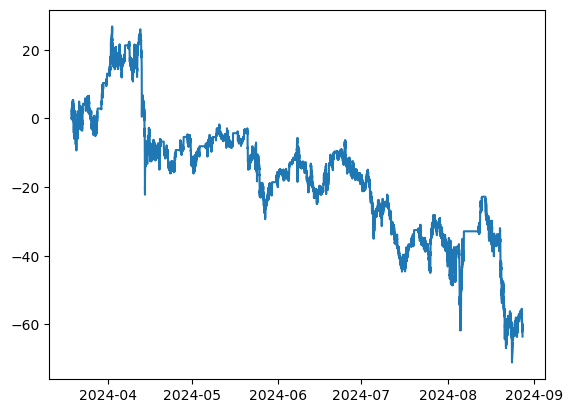

In [121]:
plt.plot(data['total_pnl'])

In [133]:
D1 = pd.read_csv('data_MANA-USDT-SWAP.csv', low_memory=False)
D2 = pd.read_csv('data_SAND-USDT-SWAP.csv', low_memory=False)
D3 = pd.read_csv('data_AAVE-USDT-SWAP.csv', low_memory=False)
D4 = pd.read_csv('data_1INCH-USDT-SWAP.csv', low_memory=False)

df1=pd.DataFrame(D1)[0:49902]
df2=pd.DataFrame(D2)[0:49902]
df3=pd.DataFrame(D3)[0:49902]
df4=pd.DataFrame(D4)[0:49902]

df1.index = pd.to_datetime(df1['time'])
df2.index = pd.to_datetime(df2['time'])
df3.index = pd.to_datetime(df3['time'])
df4.index = pd.to_datetime(df4['time'])

In [157]:
k1=df1['close']
k2=df2['close']
data=pd.concat([k1,k2], axis=1)

In [159]:
K

,close,close
time,,
2024-02-01 16:15:00,0.4298,0.4343
2024-02-01 16:20:00,0.4300,0.4347
2024-02-01 16:25:00,0.4302,0.4344
2024-02-01 16:30:00,0.4305,0.4345
2024-02-01 16:35:00,0.4306,0.4342
...,...,...
2024-07-23 22:20:00,0.3273,0.3183
2024-07-23 22:25:00,0.3260,0.3171
2024-07-23 22:30:00,0.3273,0.3182


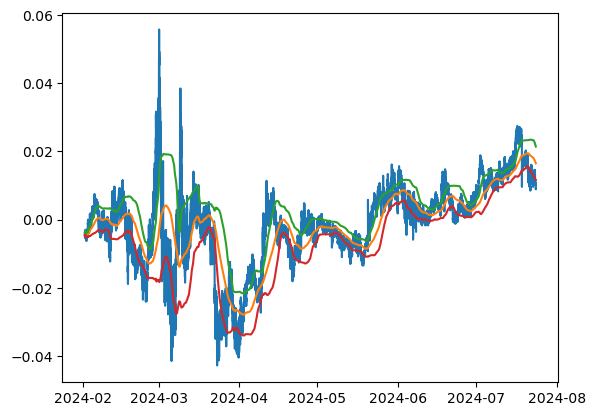

In [161]:
spd = df1['close'] - df2['close']
meanSpd = spd.rolling('7D').mean()
stdSpd = spd.rolling('7D').std()
plt.plot(spd.index, spd)
plt.plot(meanSpd.index, meanSpd)
plt.plot(meanSpd.index, meanSpd + stdSpd)
plt.plot(meanSpd.index, meanSpd - stdSpd)

In [163]:
# Initialize pnl, cumpnl, and unrealized pnl in the data
data['pnl'] = 0.0
data['cumpnl'] = 0.0
data['unrealized_pnl'] = 0.0
data['total_pnl'] = 0.0  # To store the sum of cumpnl and unrealized pnl

pos = 0  
entry_spd = 0  
cumulative_pnl = 0  


for i in range(len(spd)):
    if pos == 0:
        if spd.iloc[i] > meanSpd.iloc[i] + stdSpd.iloc[i]:  # Short entry
            pos = -1
            entry_spd = spd.iloc[i]
        elif spd.iloc[i] < meanSpd.iloc[i] - stdSpd.iloc[i]:  # Long entry
            pos = 1
            entry_spd = spd.iloc[i]
    
    # If a position is open, calculate the unrealized PnL
    if pos != 0:
        if pos == 1:  # Long position
            data.loc[spd.index[i], 'unrealized_pnl'] = spd.iloc[i] - entry_spd
        elif pos == -1:  # Short position
            data.loc[spd.index[i], 'unrealized_pnl'] = entry_spd - spd.iloc[i]
    
    # Exit condition (Close the position)
    if pos == 1 and spd.iloc[i] > meanSpd.iloc[i]:  # Close long
        realized_pnl = spd.iloc[i] - entry_spd
        data.loc[spd.index[i], 'pnl'] = realized_pnl
        cumulative_pnl += realized_pnl
        pos = 0
    elif pos == -1 and spd.iloc[i] < meanSpd.iloc[i]:  # Close short
        realized_pnl = entry_spd - spd.iloc[i]
        data.loc[spd.index[i], 'pnl'] = realized_pnl
        cumulative_pnl += realized_pnl
        pos = 0
    
    # Update cumulative PnL
    data.loc[spd.index[i], 'cumpnl'] = cumulative_pnl
    
    # If no position is open, reset unrealized pnl to 0
    if pos == 0:
        data.loc[spd.index[i], 'unrealized_pnl'] = 0.0
    
    # Sum cumulative pnl and unrealized pnl
    data.loc[spd.index[i], 'total_pnl'] = data.loc[spd.index[i], 'cumpnl'] + data.loc[spd.index[i], 'unrealized_pnl']

print(data)


                      close   close  pnl  cumpnl  unrealized_pnl  total_pnl
time                                                                       
2024-02-01 16:15:00  0.4298  0.4343  0.0  0.0000          0.0000     0.0000
2024-02-01 16:20:00  0.4300  0.4347  0.0  0.0000          0.0000     0.0000
2024-02-01 16:25:00  0.4302  0.4344  0.0  0.0000          0.0000     0.0000
2024-02-01 16:30:00  0.4305  0.4345  0.0  0.0000         -0.0002    -0.0002
2024-02-01 16:35:00  0.4306  0.4342  0.0  0.0000         -0.0006    -0.0006
...                     ...     ...  ...     ...             ...        ...
2024-07-23 22:20:00  0.3273  0.3183  0.0  0.3386         -0.0064     0.3322
2024-07-23 22:25:00  0.3260  0.3171  0.0  0.3386         -0.0065     0.3321
2024-07-23 22:30:00  0.3273  0.3182  0.0  0.3386         -0.0063     0.3323
2024-07-23 22:35:00  0.3277  0.3187  0.0  0.3386         -0.0064     0.3322
2024-07-23 22:40:00  0.3280  0.3187  0.0  0.3386         -0.0061     0.3325

[49902 rows

In [164]:
data

,close,close,pnl,cumpnl,unrealized_pnl,total_pnl
time,,,,,,
2024-02-01 16:15:00,0.4298,0.4343,0.0,0.0000,0.0000,0.0000
2024-02-01 16:20:00,0.4300,0.4347,0.0,0.0000,0.0000,0.0000
2024-02-01 16:25:00,0.4302,0.4344,0.0,0.0000,0.0000,0.0000
2024-02-01 16:30:00,0.4305,0.4345,0.0,0.0000,-0.0002,-0.0002
2024-02-01 16:35:00,0.4306,0.4342,0.0,0.0000,-0.0006,-0.0006
...,...,...,...,...,...,...
2024-07-23 22:20:00,0.3273,0.3183,0.0,0.3386,-0.0064,0.3322
2024-07-23 22:25:00,0.3260,0.3171,0.0,0.3386,-0.0065,0.3321
2024-07-23 22:30:00,0.3273,0.3182,0.0,0.3386,-0.0063,0.3323


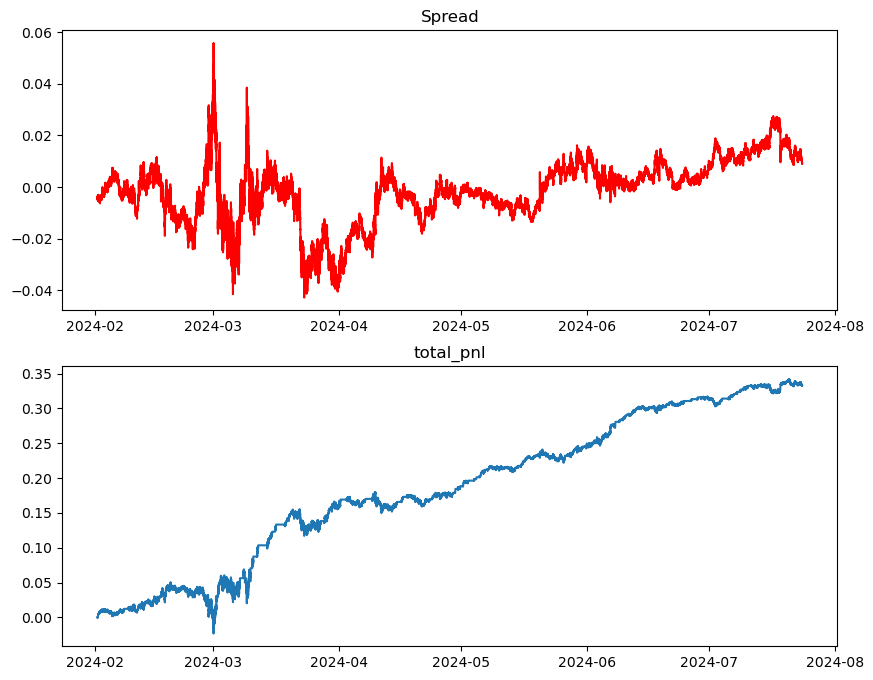

In [183]:
plt.figure(figsize=(10, 8)) 
plt.subplot(2,1,1)
plt.title('Spread')
plt.plot(spd, color='red')


plt.subplot(2,1,2)
plt.title('total_pnl')
plt.plot(data['total_pnl'])

